## RS Oph Brightness Temperature plot

In [1]:
#imports

import numpy as np
import pandas as pd
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
%matplotlib inline

### Using a velocity of low = 2700 km/s and a High = 4700 km/s, from "Study of 2021 outburst of the recurrent nova RS Ophiuchi: Photoionization and morphokinematic modelling"

In [2]:
	
data_novas = (

["V392 Per",	3.40,    	0.78,			0.33,			"Gaia DR3 Parallax",			"2500 +/- 200",		"5500 +/- 300"],
["V1535 Sco",	7.79,	  	0.75,	        	0.69,			"Gaia DR3 Parallax",],
["V5589 Sgr",	8.04,		1.78,			1.35,			"Extinctions / Mass Model",					"4500 +/- 500"],
["RS Oph",		2.71,		0.2,			0.13,			"Gaia DR3 Parallax",],			
["V1534 Sco",	9.11,		2.14,			1.55,			"Extinctions/Colors/Mass Model",],
)

df_novas = pd.DataFrame(data_novas, columns = ['Nova', 'Distance', 'Distance Error (+)', 
                                               'Distance Error (-)', 'Distance Source', "V1(km/s)",		"V2(km/s)"])

df_novas

,Nova,Distance,Distance Error (+),Distance Error (-),Distance Source,V1(km/s),V2(km/s)
0,V392 Per,3.40,0.78,0.33,Gaia DR3 Parallax,2500 +/- 200,5500 +/- 300
1,V1535 Sco,7.79,0.75,0.69,Gaia DR3 Parallax,None,None
2,V5589 Sgr,8.04,1.78,1.35,Extinctions / Mass Model,4500 +/- 500,None
3,RS Oph,2.71,0.20,0.13,Gaia DR3 Parallax,None,None
4,V1534 Sco,9.11,2.14,1.55,Extinctions/Colors/Mass Model,None,None


In [3]:
#making the data frames from the freqs

f2_6 = (
    [59439.04,	2.6,	4.71,	0.14],
    [59440.08,	2.6,	18.206,	0.11],
    [59443.99,	2.6,	68.929,	0.37],
    [59446.01,	2.6,	88.695,	0.21],
    [59446.99,	2.6,	84.443,	0.34],
    [59451.01,	2.6,	92.534,	0.24],	
    [59461.01,	2.6,	94.467,	0.22],
    [59463.02,	2.6,	88.638,	0.2],		
    [59466.04,	2.6,	58.862,	0.17],			
    [59467.99,	2.6,	81.96,	0.23],
    [59470.01,	2.6,	74.216,	0.24],
    [59487.96,	2.6,	65.358,	0.18],
    [59510.94,	2.6,	27.414,	0.13],
    [59511.92,	2.6,	36.139,	0.13],
    [59523.82,	2.6,	32.964,	0.13],		
    [59574.76,	2.6,	17.902,	0.2],
    [59588.66,	2.6,	24.59,	0.16],
    [59590.61,	2.6,	24.388,	0.21],
    [59595.61,	2.6,	23.163,	0.16],
    [60034.47,	2.6,	3.295,	0.17],
    [60049.34,	2.6,	2.777,	0.17],
    [60131.12,	2.6,	1.808,	0.017],
)

f3_4 = (
    [59439.04,	3.4,	5.328,	0.093],
    [59440.08,	3.4,	23.366,	0.1],
    [59443.99,	3.4,	73.933,	0.11],
    [59446.01,	3.4,	78.259,	0.11],
    [59446.99,	3.4,	82.034,	0.13],
    [59451.01,	3.4,	83.135,	0.19],
    [59461.01,	3.4,	85.812,	0.17],
    [59463.02,	3.4,	80.579,	0.17],
    [59466.04,	3.4,	58.434,	0.13],
    [59467.99,	3.4,	75.044,	0.15],
    [59470.01,	3.4,	67.992,	0.14],
    [59487.96,	3.4,	60.804,	0.13],
    [59510.94,	3.4,	30.985,	0.086],
    [59511.92,	3.4,	36.456,	0.11],
    [59523.82,	3.4,	32.519,	0.092],
    [59574.76,	3.4,	17.739,	0.18],
    [59588.66,	3.4,	22.702,	0.14],
    [59590.61,	3.4,	22.617,	0.11],
    [59595.61,	3.4,	20.742,	0.13],
    [60034.47,	3.4,	3.342,	0.12],
    [60049.34,	3.4,	2.82,	0.078],
    [60131.12,	3.4,	1.999,	0.014],
)
f5_1 = (
    [59439.04,	5.1,	10.012,	0.058],
    [59440.08,	5.1,	33.454,	0.059],
    [59443.99,	5.1,	67.597,	0.087],
    [59446.01,	5.1,	60.457,	0.065],
    [59446.99,	5.1,	63.977,	0.083],
    [59451.01,	5.1,	61.832,	0.074],
    [59461.01,	5.1,	65.115,	0.074],
    [59463.02,	5.1,	60.766,	0.069],
    [59466.04,	5.1,	54.499,	0.067],
    [59467.99,	5.1,	60.253,	0.061],
    [59470.01,	5.1,	56.608,	0.058],
    [59487.96,	5.1,	49.879,	0.061],
    [59510.94,	5.1,	36.454,	0.052],
    [59511.92,	5.1,	36.228,	0.053],
    [59523.82,	5.1,	31.849,	0.053],
    [59574.76,	5.1,	17.481,	0.064],
    [59588.66,	5.1,	18.554,	0.06],
    [59590.61,	5.1,	19.794,	0.062],
    [59595.61,	5.1,	17.488,	0.056],
    [60034.47,	5.1,	2.765,	0.052],
    [60049.34,	5.1,	2.684,	0.053],
    [60131.12,	5.1,	2.163,	0.016],
)
f7 = (
    [59439.04,	7,	15.607,	0.057],
    [59440.08,	7,	39.663,	0.055],
    [59443.99,	7,	58.65,	0.068],
    [59446.01,	7,	50.875,	0.057],
    [59446.99,	7,	51.883,	0.062],
    [59451.01,	7,	52.291,	0.059],
    [59461.01,	7,	57.617,	0.064],
    [59463.02,	7,	56.003,	0.062],
    [59466.04,	7,	54.364,	0.068],
    [59467.99,	7,	55.839,	0.055],
    [59470.01,	7,	54.465,	0.056],
    [59487.96,	7,	46.096,	0.058],
    [59510.94,	7,	38.595,	0.05],	
    [59511.92,	7,	38.215,	0.053],
    [59523.82,	7,	32.08,	0.049],
    [59574.76,	7,	19.527,	0.06],
    [59588.66,	7,	18.619,	0.051],
    [59590.61,	7,	19.169,	0.052],
    [59595.61,	7,	17.871,	0.057],
    [60034.47,	7,	2.347,	0.049],
    [60049.34,	7,	2.373,	0.046],
    [60131.12,	7,	2.336,	0.018],
)
f13_7 = (
    [59439.04,	13.7,	24.088,	0.055],
    [59440.08,	13.7,	40.939,	0.062],
    [59443.99,	13.7,	47.847,	0.066],
    [59446.01,	13.7,	43.692,	0.054],
    [59446.99,	13.7,	41.854,	0.056],
    [59451.01,	13.7,	44.133,	0.054],
    [59461.01,	13.7,	54.102,	0.06],
    [59463.02,	13.7,	51.457,	0.068],
    [59467.99,	13.7,	55.46,	0.057],
    [59470.01,	13.7,	56.891,	0.061],
    [59487.96,	13.7,	51.336,	0.074],
    [59511.92,	13.7,	45.791,	0.053],
    [59523.82,	13.7,	38.122,	0.049],
    [59574.76,	13.7,	25.248,	0.067],
    [59588.66,	13.7,	21.6,	0.051],
    [59590.61,	13.7,	21.908,	0.051],
    [59595.61,	13.7,	20.702,	0.05],
    [60034.47,	13.7,	1.672,	0.05],
    [60049.34,	13.7,	1.67,	0.048],
    [60131.12,	13.7,	1.933,	0.02],
)
f16_5 = (
    [59439.04,	16.5,	25.573,	0.059],
    [59440.08,	16.5,	41.636,	0.063],
    [59443.99,	16.5,	46.81,	0.063],
    [59446.01,	16.5,	42.418,	0.055],
    [59446.99,	16.5,	40.83,	0.056],
    [59451.01,	16.5,	42.894,	0.061],
    [59461.01,	16.5,	54.536,	0.065],
    [59463.02,	16.5,	54.259,	0.074],
    [59467.99,	16.5,	57.657,	0.059],
    [59470.01,	16.5,	60.279,	0.063],
    [59487.96,	16.5,	55.64,	0.083],
    [59511.92,	16.5,	50.332,	0.052],
    [59523.82,	16.5,	41.511,	0.05],
    [59574.76,	16.5,	26.955,	0.061],
    [59588.66,	16.5,	22.164,	0.053],
    [59590.61,	16.5,	22.994,	0.047],
    [59595.61,	16.5,	21.855,	0.048],
    [60034.47,	16.5,	1.526,	0.051],
    [60049.34,	16.5,	1.541,	0.048],
    [60131.12,	16.5,	1.923,	0.022],
)
f31_1 = (
    [59439.04,	31.1,	35.973,	0.14],
    [59440.08,	31.1,	44.762,	0.14],
    [59443.99,	31.1,	48.13,	0.14],
    [59446.01,	31.1,	46.076,	0.12],
    [59446.99,	31.1,	43.653,	0.12],
    [59451.01,	31.1,	47.067,	0.12],
    [59461.01,	31.1,	70.776,	0.15],
    [59463.02,	31.1,	75.224,	0.17],
    [59467.99,	31.1,	85.302,	0.13],
    [59470.01,	31.1,	92.384,	0.14],
    [59487.96,	31.1,	92.061,	0.14],
    [59511.92,	31.1,	79.492,	0.12],
    [59523.82,	31.1,	66.05,	0.11],
    [59574.76,	31.1,	42.236,	0.34],
    [59588.66,	31.1,	26.488,	0.1],
    [59590.61,	31.1,	28.341,	0.11],
    [59595.61,	31.1,	27.116,	0.11],
    [60034.47,	31.1,	0.87,	0.1],
    [60049.34,	31.1,	1.077,	0.11],
    [60131.12,	31.1,	1.336,	0.066],
)

f34_9 = (
    [59439.04,	34.9,	38.318,	0.16],
    [59440.08,	34.9,	46.68,	0.15],
    [59443.99,	34.9,	49.924,	0.16],
    [59446.01,	34.9,	48.49,	0.14],
    [59446.99,	34.9,	45.965,	0.13],
    [59451.01,	34.9,	48.103,	0.13],
    [59461.01,	34.9,	77.042,	0.16],
    [59463.02,	34.9,	82.831,	0.18],
    [59467.99,	34.9,	94.908,	0.14],
    [59470.01,	34.9,	103.52,	0.15],
    [59487.96,	34.9,	103.31,	0.16],
    [59511.92,	34.9,	88.439,	0.13],
    [59523.82,	34.9,	72.993,	0.12],
    [59574.76,	34.9,	47.137,	0.35],
    [59588.66,	34.9,	27.475,	0.11],
    [59590.61,	34.9,	29.746,	0.12],
    [59595.61,	34.9,	28.356,	0.11],
    [60034.47,	34.9,	0.862,	0.11],
    [60049.34,	34.9,	1.113,	0.12],
    [60131.12,	34.9,	1.306,	0.079],
)


In [4]:
df2_6 =  pd.DataFrame(f2_6, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df3_4 =  pd.DataFrame(f3_4, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df5_1 =  pd.DataFrame(f5_1, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df7 =  pd.DataFrame(f7, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df13_7 =  pd.DataFrame(f13_7, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df16_5 =  pd.DataFrame(f16_5, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df31_1 =  pd.DataFrame(f31_1, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])

df34_9 =  pd.DataFrame(f34_9, columns = ["MJD", "Freq (GHz)", "Flux Density (mJy)", "Uncertainty (mJy)"])


In [5]:
days2_6 = df2_6['MJD'] - 59434
flux2_6 = df2_6["Flux Density (mJy)"]
flux_err2_6 = np.sqrt(df2_6["Uncertainty (mJy)"]**2 + (df2_6["Flux Density (mJy)"]*0.05)**2)

days3_4 = df3_4['MJD'] - 59434
flux3_4 = df3_4["Flux Density (mJy)"]
flux_err3_4 = np.sqrt(df3_4["Uncertainty (mJy)"]**2 + (df3_4["Flux Density (mJy)"]*0.05)**2)

days5_1 = df5_1['MJD'] - 59434
flux5_1 = df5_1["Flux Density (mJy)"]
flux_err5_1 = np.sqrt(df5_1["Uncertainty (mJy)"]**2 + (df5_1["Flux Density (mJy)"]*0.05)**2)

days7 = df7['MJD'] - 59434
flux7 = df7["Flux Density (mJy)"]
flux_err7 = np.sqrt(df7["Uncertainty (mJy)"]**2 + (df7["Flux Density (mJy)"]*0.05)**2)

days13_7 = df13_7['MJD'] - 59434
flux13_7 = df13_7["Flux Density (mJy)"]
flux_err13_7 = np.sqrt(df13_7["Uncertainty (mJy)"]**2 + (df13_7["Flux Density (mJy)"]*0.1)**2)

days16_5 = df16_5['MJD'] - 59434
flux16_5 = df16_5["Flux Density (mJy)"]
flux_err16_5 = np.sqrt(df16_5["Uncertainty (mJy)"]**2 + (df16_5["Flux Density (mJy)"]*0.1)**2)

days31_1 = df31_1['MJD'] - 59434
flux31_1 = df31_1["Flux Density (mJy)"]
flux_err31_1 = np.sqrt(df31_1["Uncertainty (mJy)"]**2 + (df31_1["Flux Density (mJy)"]*0.1)**2)

days34_9 = df34_9['MJD'] - 59434
flux34_9 = df34_9["Flux Density (mJy)"]
flux_err34_9 = np.sqrt(df34_9["Uncertainty (mJy)"]**2 + (df34_9["Flux Density (mJy)"]*0.1)**2)

## Now the function to find brightness temp

In [6]:
Vlow = 2700 * 100000
Vhigh = 4700 * 100000
Distlow = 2.58 *  3.086*10**21    
Disthigh = 2.91 *  3.086*10**21    

In [7]:
Dist =   2.71 * 3.086*10**21              #distance in cm
V_const =  3700 * 100000        #velocity in cm/s


def Con_TB(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(V_const * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Dist)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)
        

In [8]:
nu0 = 2.6 #FREQUENCY 1
nu1 = 7 #frequency 2
nu2 = 16.5 #frequency 3
nu3 = 31.1  #freq 4


date_CAC_sec_n0 = days2_6 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))
date_CAC_sec_n1 = days7 * 86400    #time in seconds 
date_CAC_sec_n2 = days16_5 * 86400    #time in seconds 
date_CAC_sec_n3 = days31_1 * 86400

In [9]:
CTB_nu0, CTBError_nu0 = Con_TB(flux2_6, date_CAC_sec_n0, flux_err2_6, nu0)

CTB_nu1, CTBError_nu1 = Con_TB(flux7, date_CAC_sec_n1, flux_err7, nu1)

CTB_nu2, CTBError_nu2 = Con_TB(flux16_5, date_CAC_sec_n2, flux_err16_5, nu2)

CTB_nu3, CTBError_nu3 = Con_TB(flux31_1, date_CAC_sec_n3, flux_err31_1, nu3)

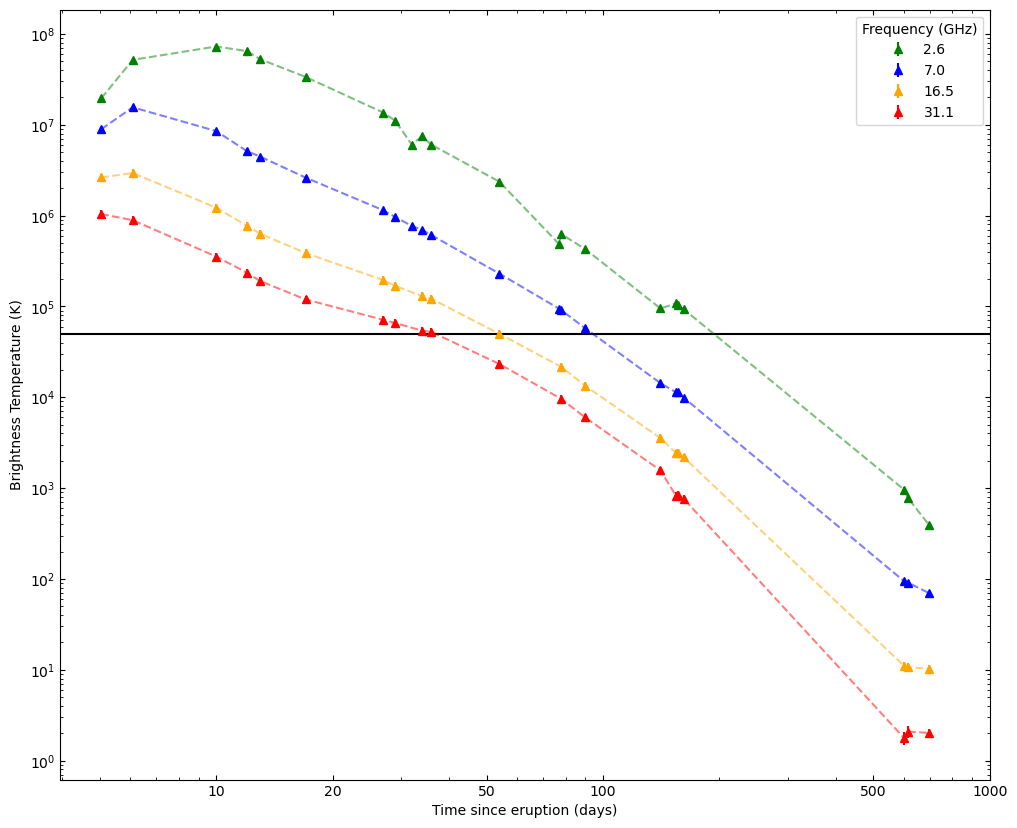

In [10]:

fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.axhline(y=5*10**4, color='black', linestyle='-', linewidth=1.5)

#using a function to plot the detections only
# Store which labels have already been used
used_labels = set()

def plot(days, CTBs, CTBerrors, fluxes, errors, color, label_name):
    for day, CTB, CTBerr, flux, err in zip(days, CTBs, CTBerrors, fluxes, errors):
        if flux < 3 * err:
            fmt = 'x'  # square for non-detection
            label = None  # no label for non-detections
            ax.errorbar(day, CTB, fmt=fmt, color=color, label=label)
            
        else:
            fmt = '^'  # triangle for detection
            label = label_name if label_name not in used_labels else None
        
            ax.errorbar(day, CTB, yerr=CTBerr, fmt=fmt, color=color, label=label)
        
        if label:
            used_labels.add(label)


plot(days2_6, CTB_nu0, CTBError_nu0, flux2_6, flux_err2_6,'green', '2.6')
ax.plot(days2_6[0:27], CTB_nu0[0:27], color='green', linestyle = '--', alpha=.50)

plot(days7, CTB_nu1, CTBError_nu1, flux7, flux_err7,'blue', '7.0')
ax.plot(days7[0:30], CTB_nu1[0:30], color='blue', linestyle = '--', alpha=.50)

plot(days16_5, CTB_nu2, CTBError_nu2, flux16_5, flux_err16_5,'orange', '16.5')
ax.plot(days16_5[0:30], CTB_nu2[0:30], color='orange', linestyle = '--', alpha=.50)

plot(days31_1, CTB_nu3, CTBError_nu3, flux31_1, flux_err31_1,'red', '31.1')
ax.plot(days31_1[0:30], CTB_nu3[0:30], color='red', linestyle = '--', alpha=.50)


ax.set_xscale('log')
ax.set_xticks([10,20,50,100,500,1000], labels = ['10','20','50','100','500', '1000'])
ax.set_yscale('log')
#ax.set_yticks([.1,1,10], labels = ['0.1','1.0','10.0'])
ax.set_xlabel("Time since eruption (days)")
ax.set_ylabel("Brightness Temperature (K)")


ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.legend(title='Frequency (GHz)')
plt.show();

In [11]:
Vlow = 2700 * 100000
Vhigh = 4700 * 100000
Distlow = 2.58 *  3.086*10**21    
Disthigh = 2.91 *  3.086*10**21    

In [12]:
Dist =   2.71 * 3.086*10**21              #distance in cm
V_const =  3700 * 100000        #velocity in cm/s


def Con_TBlow(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vhigh * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Distlow)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)



def Con_TBhigh(S,T,E,nu): #flux denisty, time, error of flux density, frequency in order those are the plug ins
    R = []
    CTB = []
    CTBE = []

    S = np.array(S)
    T = np.array(T)
    E = np.array(E)
    
    for i in range(len(S)):
        R.append(Vlow * T[i])  #velocity over time                  #R in cm
        angular_diam = 206265 * ((2*R[i])/ Disthigh)                       #unitless
        CTB.append(1765.8 * (nu**(-2)) * S[i]*(angular_diam**(-2)))    #mJy / (Ghz^2)
        CTBE.append(1765.8 * (nu**(-2)) * E[i]*(angular_diam**(-2)))
    
    return(CTB, CTBE)
        

In [13]:
nu2_6 = 2.6
date_CAC_sec_n2_6 = days2_6 * 86400    #time in seconds  (date_CAC is going to be a list of times (from t0))

In [14]:
CTB_nuhigh, CTBError_nuhigh = Con_TBhigh(flux2_6, date_CAC_sec_n2_6, flux_err2_6, nu2_6)
print(CTB_nuhigh)

[42176096.80029783, 112024736.47509353, 157100494.6939254, 139868421.7343949, 113828733.30681664, 72744348.69755195, 29453540.445128653, 23940415.474956546, 13042371.023531782, 16136382.193271099, 13018407.21001142, 5105772.068127274, 1053354.598659835, 1353894.4078487197, 929395.0501035245, 205517.86874597374, 233834.75881869806, 226174.5621994498, 201727.40310139046, 2078.6402901510223, 1668.2154401036762, 846.2328730352525]


In [15]:
CTB_nulow, CTBError_nulow = Con_TBlow(flux2_6, date_CAC_sec_n2_6, flux_err2_6, nu2_6)
print(CTB_nulow)

[10940864.306432141, 29060238.706801407, 40753301.64045582, 36283144.69678551, 29528211.943835914, 18870547.740066815, 7640517.112808977, 6210362.196182606, 3383310.0364469034, 4185924.7622947493, 3377093.604584269, 1324483.8573245455, 273249.7932433653, 351212.56174197566, 241093.55539464153, 53313.210208701734, 60658.86984460344, 58671.74495325518, 52329.928837930456, 539.218255878635, 432.75030523783346, 219.52052792745718]


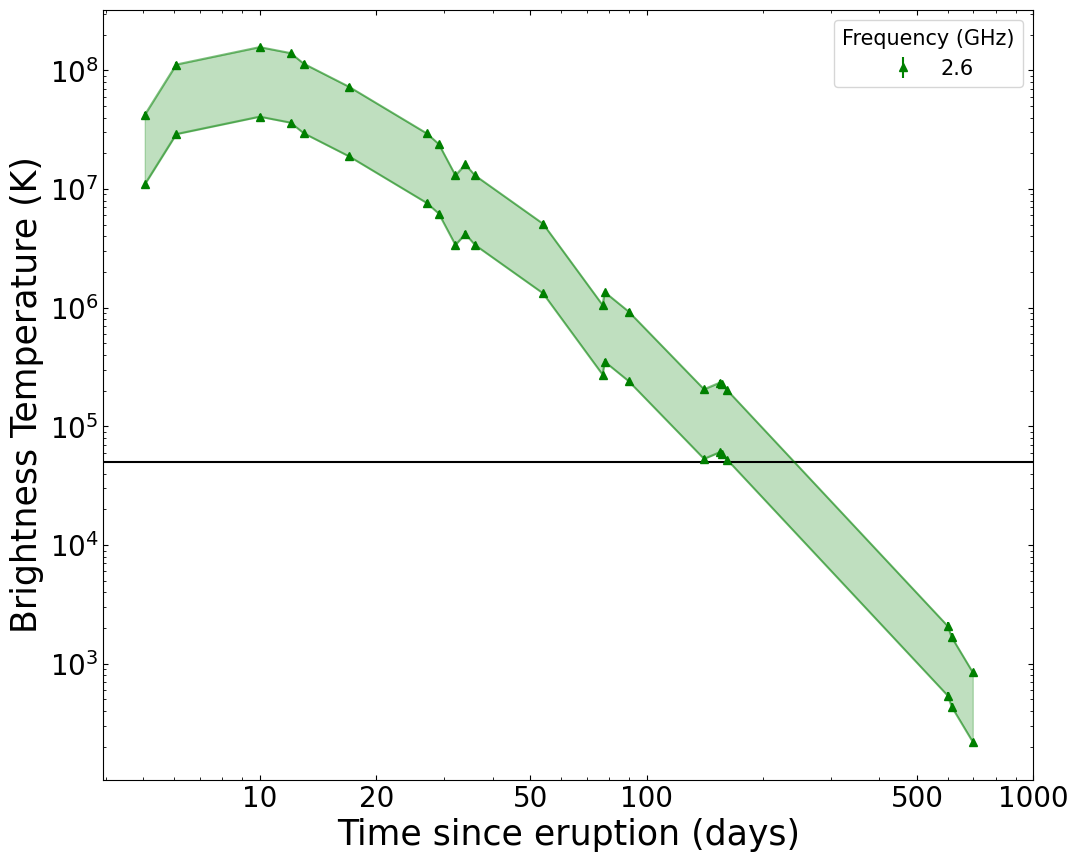

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)

ax.axhline(y=5*10**4, color='black', linestyle='-', linewidth=1.5)

#using a function to plot the detections only
# Store which labels have already been used
used_labels = set()

def plot(days, CTBs, CTBerrors, fluxes, errors, color, label_name):
    for day, CTB, CTBerr, flux, err in zip(days, CTBs, CTBerrors, fluxes, errors):
        if flux < 3 * err:
            fmt = 'x'  # square for non-detection
            label = None  # no label for non-detections
            ax.errorbar(day, CTB, fmt=fmt, color=color, label=label)
            
        else:
            fmt = '^'  # triangle for detection
            label = label_name if label_name not in used_labels else None
        
            ax.errorbar(day, CTB, yerr=CTBerr, fmt=fmt, color=color, label=label)
        
        if label:
            used_labels.add(label)


plot(days2_6, CTB_nuhigh, CTBError_nuhigh, flux2_6, flux_err2_6,'green', '2.6')
ax.plot(days2_6[0:27], CTB_nuhigh[0:27], color='green', linestyle = '-', alpha=.50)

plot(days2_6, CTB_nulow, CTBError_nulow, flux2_6, flux_err2_6,'green', '2.6')
ax.plot(days2_6[0:27], CTB_nulow[0:27], color='green', linestyle = '-', alpha=.50)

ax.fill_between(days2_6, CTB_nulow, CTB_nuhigh, alpha=.25, color='green')

ax.set_xscale('log')
ax.set_xticks([10,20,50,100,500,1000], labels = ['10','20','50','100','500', '1000'], fontsize=20)
ax.set_yscale('log')
ax.set_yticks([1000, 10000, 100000, 1000000, 10000000, 100000000], labels = [r'$10^{3}$', r'$10^{4}$', r'$10^{5}$', r'$10^{6}$', r'$10^{7}$', r'$10^{8}$'],fontsize=20)
ax.set_xlabel("Time since eruption (days)", fontsize = 25)
ax.set_ylabel("Brightness Temperature (K)", fontsize = 25)


ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.legend(title='Frequency (GHz)', title_fontsize=15, fontsize=15)
plt.show();